In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import numpy as np
from matplotlib.mlab import griddata
import datetime
%matplotlib inline

In [3]:
kansas_data = pd.read_csv('kansas_data_cleaned.csv')

/Users/apple/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
kansas_data.head()

,Unnamed: 0,id,agency,daterept,hourrept,ucrcode,offense,neighborhood,subdivision,spx,...,Minute,Time,Date,Day,DayOfWeek,Week,Month,Year,FullDayOfWeek,FullMonth
0,1,2,JCSO,7/3/15 0:00,15:14:00,35A,POSSESSION OF HALLUCINOGENIC DRUG,NaN,-1.0,2144629.87,...,14,914,2015-07-03,3,4,27,7,2015,Friday,Jul
1,2,3,JCSO,6/27/05 0:00,13:46:00,90Z,DRIVING WHILE HABITUAL VIOLATOR,NaN,-1.0,2149483.00,...,46,826,2005-06-27,27,0,26,6,2005,Monday,Jun
2,3,4,JCSO,2/5/05 0:00,01:45:00,90Z,FAILURE TO APPEAR,NaN,-1.0,2149483.00,...,45,105,2005-02-05,5,5,5,2,2005,Saturday,Feb
3,4,5,JCSO,4/14/10 0:00,19:52:00,90D,DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; U...,JC1,10200.0,2149561.34,...,52,1192,2010-04-14,14,2,15,4,2010,Wednesday,Apr
4,5,6,JCSO,3/18/11 0:00,21:15:00,90Z,CONTEMPT OF COURT; INDIRECT,JC1,10200.0,2149561.34,...,15,1275,2011-03-18,18,4,11,3,2011,Friday,Mar


In [5]:
kansas_data=kansas_data.drop(kansas_data.columns[0],axis=1)

In [6]:
kansas_data.head()

,id,agency,daterept,hourrept,ucrcode,offense,neighborhood,subdivision,spx,spy,...,Minute,Time,Date,Day,DayOfWeek,Week,Month,Year,FullDayOfWeek,FullMonth
0,2,JCSO,7/3/15 0:00,15:14:00,35A,POSSESSION OF HALLUCINOGENIC DRUG,NaN,-1.0,2144629.87,235038.10,...,14,914,2015-07-03,3,4,27,7,2015,Friday,Jul
1,3,JCSO,6/27/05 0:00,13:46:00,90Z,DRIVING WHILE HABITUAL VIOLATOR,NaN,-1.0,2149483.00,235692.14,...,46,826,2005-06-27,27,0,26,6,2005,Monday,Jun
2,4,JCSO,2/5/05 0:00,01:45:00,90Z,FAILURE TO APPEAR,NaN,-1.0,2149483.00,235692.14,...,45,105,2005-02-05,5,5,5,2,2005,Saturday,Feb
3,5,JCSO,4/14/10 0:00,19:52:00,90D,DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; U...,JC1,10200.0,2149561.34,235690.68,...,52,1192,2010-04-14,14,2,15,4,2010,Wednesday,Apr
4,6,JCSO,3/18/11 0:00,21:15:00,90Z,CONTEMPT OF COURT; INDIRECT,JC1,10200.0,2149561.34,235690.68,...,15,1275,2011-03-18,18,4,11,3,2011,Friday,Mar


In [7]:
kansas_data.shape

(335484, 35)

In [8]:
def missing_count(dataset):
    missing = {}
    for col in dataset.columns:
        missing[col] = len(dataset[dataset[col].isnull()])
    return missing

In [9]:
missing_count(kansas_data)

{'Date': 0,
 'Day': 0,
 'DayOfWeek': 0,
 'FullDayOfWeek': 0,
 'FullMonth': 0,
 'Hour': 0,
 'Minute': 0,
 'Month': 0,
 'Time': 0,
 'Week': 0,
 'Year': 0,
 'agency': 1,
 'apid': 97694,
 'city': 0,
 'crimetype': 0,
 'daterept': 0,
 'fulllocation': 0,
 'geom': 0,
 'hourrept': 0,
 'id': 0,
 'inactivitydescription': 34306,
 'incidentid': 0,
 'location': 0,
 'neighborhood': 70097,
 'offense': 1,
 'premisedescription': 30357,
 'spx': 0,
 'spy': 0,
 'state': 2804,
 'subdivision': 30747,
 'theftdescription': 234937,
 'ucrcode': 0,
 'x': 0,
 'y': 0,
 'zip': 24797}

In [10]:
kansas_data = kansas_data.dropna(subset = ['offense'])

### Crime Trends

In [11]:
top25_ks=pd.DataFrame({'Counts':kansas_data.offense.value_counts()[:25]})

In [12]:
top25_ks

,Counts
THEFT,46835
FAILURE TO APPEAR,20021
CRIMINAL DAMAGE TO PROPERTY,17704
BATTERY,15776
THEFT OF PROPERTY OR SERVICES; MISDEMEANOR,13545
THEFT - ALL OTHER,10310
THEFT - AUTO BURGLARY,9445
BURGLARY,8745
DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; UNKNOWN SEVERIT,8418
THEFT OF MOTOR VEHICLE,7690


In [13]:
top10_ks_ucrcode=pd.DataFrame({'Counts':kansas_data.ucrcode.value_counts()[:10]})

In [14]:
top10_ks_ucrcode

,Counts
23,90226
13B,35898
90Z,35550
290,29843
35A,19112
90D,19098
220,15310
13C,12794
23H,10335
240,9775


In [15]:
kansas_data[kansas_data.ucrcode=='23']['offense'].head(20)

29                                   THEFT OF MOTOR FUEL
45                                                 THEFT
51     THEFT OF PROPERTY OR SERVICES; VALUE $1,000 TO...
58     THEFT OF PROPERTY OR SERVICES; VALUE $1,000 TO...
66     THEFT OF PROPERTY LOST OR MISLAID; OWNER KNOWN...
69                                                 THEFT
92                                                 THEFT
101    THEFT OF PROPERTY OR SERVICES; VALUE $1,000 TO...
102                                                THEFT
112                                                THEFT
121                                                THEFT
133                              THEFT BY THREAT; FELONY
137    THEFT OF PROPERTY OR SERVICES; VALUE LESS THAN...
175    THEFT OF PROPERTY OR SERVICES; VALUE $1,000 TO...
181       THEFT OF PROPERTY LOST OR MISLAID; MISDEMEANOR
183                                                THEFT
192                                                THEFT
193                            

In [16]:
kansas_data[kansas_data.ucrcode=='13B']['offense'].head(10)

86                                               BATTERY
105    DOMESTIC BATTERY; KNOWING OR RECKLESS BODILY H...
115                                              BATTERY
116                                              ASSAULT
122    DOMESTIC BATTERY; PHYSICAL CONTACT BY FAMILY M...
178    DOMESTIC BATTERY; PHYSICAL CONTACT BY FAMILY M...
274    DOMESTIC BATTERY; KNOWING OR RECKLESS BODILY H...
278                                              ASSAULT
289    DOMESTIC BATTERY; PHYSICAL CONTACT BY FAMILY M...
338                                              BATTERY
Name: offense, dtype: object

In [17]:
kansas_data[kansas_data.ucrcode=='90Z']['offense'].head(10)

1                       DRIVING WHILE HABITUAL VIOLATOR
2                                     FAILURE TO APPEAR
4                           CONTEMPT OF COURT; INDIRECT
8            DUTY OF DRIVER TO GIVE CERTAIN INFORMATION
21    OBSTRUCTING APPREHENSION OF PROSECUTION; COMMI...
27    INTERFERENCE W/ LEO; MISDEMEANOR OBSTRUCTION/R...
30                                  PROBATION VIOLATION
31                                    FAILURE TO APPEAR
32                                  PROBATION VIOLATION
33                          CONTEMPT OF COURT; INDIRECT
Name: offense, dtype: object

In [18]:
kansas_data[kansas_data.ucrcode=='290']['offense'].head(10)

59                  CRIMINAL DAMAGE TO PROPERTY
68                  CRIMINAL DAMAGE TO PROPERTY
70          CRIMINAL DAMAGE TO PROPERTY; FELONY
76                  CRIMINAL DAMAGE TO PROPERTY
84                  CRIMINAL DAMAGE TO PROPERTY
97          CRIMINAL DAMAGE TO PROPERTY; FELONY
117                 CRIMINAL DAMAGE TO PROPERTY
125                 CRIMINAL DAMAGE TO PROPERTY
136                 CRIMINAL DAMAGE TO PROPERTY
139    CRIMINAL DAMAGE TO PROPERTY; MISDEMEANOR
Name: offense, dtype: object

In [19]:
kansas_data[kansas_data.ucrcode=='90D']['offense'].head(10)

3     DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; U...
7     DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; U...
9     DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; 1...
10    DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; M...
11    DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; M...
12    DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; M...
15    DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; M...
16    DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; M...
17    DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; M...
20    DRIVING UNDER INFLUENCE OF ALCOHOL OR DRUGS; M...
Name: offense, dtype: object

In [20]:
kansas_data[kansas_data.ucrcode=='35A']['offense'].head(10)

0                     POSSESSION OF HALLUCINOGENIC DRUG
5                      POSSESS MARIJUANA (1RST OFFENSE)
6            POSSESSION OF CERTAIN HALLUCINOGENIC DRUGS
13                    POSSESSION OF HALLUCINOGENIC DRUG
14                              POSSESSION OF STIMULANT
19                    POSSESSION OF HALLUCINOGENIC DRUG
35    POSS DEPRESSANT/STIMULANTS/HALLUCINOGENICS/STE...
39    POSS MARIJUANA / DEPRESSANT/STIMULANTS / HALLU...
41                     POSSESS MARIJUANA (1RST OFFENSE)
42       POSSESSION OF OPIATES. OPIUM OR NARCOTIC DRUGS
Name: offense, dtype: object

In [21]:
kansas_data[kansas_data.ucrcode=='220']['offense'].head(10)

46                          BURGLARY
47                          BURGLARY
50                          BURGLARY
52                          BURGLARY
53                          BURGLARY
54                          BURGLARY
56    BURGLARY; UNKNOWN CIRCUMSTANCE
62                          BURGLARY
63    BURGLARY; UNKNOWN CIRCUMSTANCE
67    BURGLARY; UNKNOWN CIRCUMSTANCE
Name: offense, dtype: object

In [22]:
kansas_data[kansas_data.ucrcode=='90C']['offense'].head(10)

119                                   DISORDERLY CONDUCT
277    LEWD AND LASCIVIOUS BEHAVIOR; UNKNOWN TYPE OR ...
305             DISORDERLY CONDUCT; UNKNOWN CIRCUMSTANCE
566                        MAINTAINING A PUBLIC NUISANCE
663    ELECTRONIC SOLICITATION; OFFENDER BELIEVES CHI...
681    DISORDERLY CONDUCT; FIGHTING WORDS OR NOISY CO...
725                                   DISORDERLY CONDUCT
791                                   DISORDERLY CONDUCT
880                                   DISORDERLY CONDUCT
881    LEWD AND LASCIVIOUS; EXPOSING SEX ORGANS TO AN...
Name: offense, dtype: object

In [23]:
kansas_data[kansas_data.ucrcode=='13C']['offense'].head(10)

80     CRIMINAL THREAT; CAUSE TERROR, EVACUTION OR DI...
198                              HARASSMENT BY TELEPHONE
199                                      CRIMINAL THREAT
287                              HARASSMENT BY TELEPHONE
440                                      CRIMINAL THREAT
536    HARASS BY TELECOM DEVICE; THREATENING PHONE CA...
538                              HARASSMENT BY TELEPHONE
572                                      CRIMINAL THREAT
619    HARASS BY TELECOM DEVICE; THREATENING PHONE CA...
631                                      CRIMINAL THREAT
Name: offense, dtype: object

In [24]:
kansas_data[kansas_data.ucrcode=='23H']['offense'].head(10)

57181                               THEFT
70994                               THEFT
73800    CRIMINAL DEPRIVATION OF PROPERTY
74146                               THEFT
76281              THEFT OF MOTOR VEHICLE
76288                               THEFT
76289                               THEFT
82582                               THEFT
85709                               THEFT
86042                 THEFT OF MOTOR FUEL
Name: offense, dtype: object

In [25]:
kansas_data[kansas_data.ucrcode=='240']['offense'].head(10)

90                              THEFT OF MOTOR VEHICLE
93             CRIMINAL DEPRIVATION OF A MOTOR VEHICLE
176                             THEFT OF MOTOR VEHICLE
426                             THEFT OF MOTOR VEHICLE
531                             THEFT OF MOTOR VEHICLE
592                             THEFT OF MOTOR VEHICLE
617    CRIMINAL DEPRIVATION OF PROPERTY; MOTOR VEHICLE
643                             THEFT OF MOTOR VEHICLE
676                             THEFT OF MOTOR VEHICLE
680                             THEFT OF MOTOR VEHICLE
Name: offense, dtype: object

In [26]:
crime_incident=kansas_data['offense'].value_counts()

Text(0.5,1,u'Kansas State Crimes')

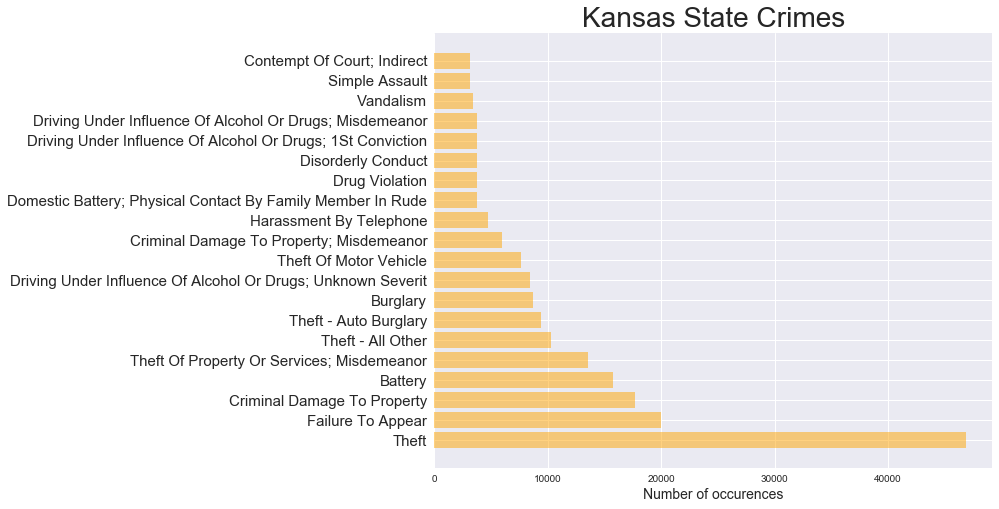

In [27]:
plt.figure(figsize=(10,8))
y_pos=np.arange(len(crime_incident[0:20].keys()))
plt.barh(y_pos, crime_incident[0:20].get_values(), align = 'center', alpha = 0.5, color = 'orange')
plt.yticks(y_pos,map(lambda x: x.title(), crime_incident[0:20].keys()), fontsize = 15)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('Kansas State Crimes', fontsize = 28)

### Now we visualize crimes by city.

In [29]:
top15_ks=pd.DataFrame({'Counts':kansas_data.city.value_counts()[:15]})

Text(0.5,1,u'Top 15 Cities with Most Crimes in Kansas')

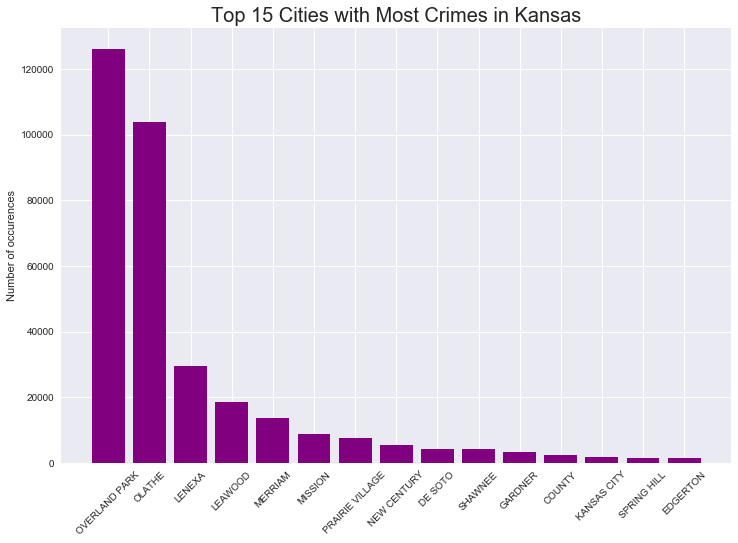

In [30]:
plt.figure(figsize = (12, 8))
plt.bar(np.arange(15), top15_ks.Counts, color = 'purple')
plt.xticks(np.arange(15), top15_ks.index, rotation = 45)
plt.ylabel("Number of occurences")
plt.title("Top 15 Cities with Most Crimes in Kansas", fontsize = 20)

In [31]:
olathe_data=kansas_data[kansas_data['city']=='OLATHE']
op_data=kansas_data[kansas_data['city']=='OVERLAND PARK']

In [33]:
op_no_court=op_data[op_data['ucrcode']!='90Z']

In [34]:
op_no_court.location.value_counts().head(10)

11800 BLOCK W 95TH ST      2593
11200 BLOCK W 95TH ST      1429
11500 BLOCK W 95TH ST      1349
7700 BLOCK FRONTAGE RD     1080
11400 BLOCK W 95TH ST       960
9400 BLOCK W 75TH ST        944
7500 BLOCK W 106TH ST       901
11500 BLOCK METCALF AVE     875
12400 BLOCK FOSTER ST       799
11100 BLOCK W 95TH ST       694
Name: location, dtype: int64

In [35]:
top10_op_danger=pd.DataFrame({'Counts':op_no_court.location.value_counts()[:10]})

Text(0.5,1,u'Top 10 most dangerous places in Overland Park')

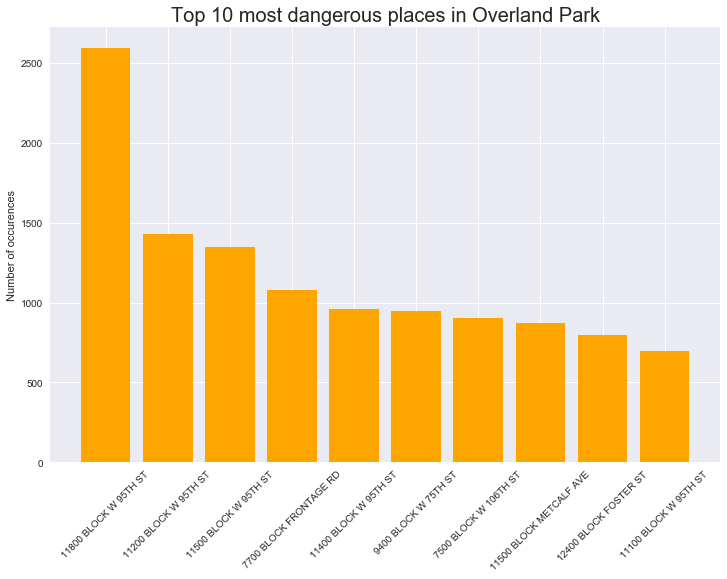

In [37]:
plt.figure(figsize = (12, 8))
plt.bar(np.arange(10), top10_op_danger.Counts, color = 'orange')
plt.xticks(np.arange(10), top10_op_danger.index, rotation = 45)
plt.ylabel("Number of occurences")
plt.title("Top 10 most dangerous places in Overland Park", fontsize = 20)

In [38]:
op_no_court.loc[op_no_court['location']=='11200 BLOCK W 95TH ST'].offense.value_counts().head(10)

THEFT                                                    771
THEFT OF PROPERTY OR SERVICES; MISDEMEANOR               263
THEFT OF PROPERTY OR SERVICES; VALUE LESS THAN $1,000     45
BATTERY                                                   37
THEFT OF PROPERTY OR SERVICES; FELONY                     36
THEFT - AUTO BURGLARY                                     21
Theft; Misdemeanor                                        17
CRIMINAL USE OF A FINANCIAL CARD                          16
THEFT OF PROPERTY OR SERVICES; UNKNOWN VALUE              14
THEFT OF PROPERTY LOST OR MISLAID; MISDEMEANOR            13
Name: offense, dtype: int64

In [39]:
olathe_no_court=olathe_data[olathe_data['ucrcode']!='90Z']

In [40]:
op_no_court.loc[op_no_court['location']=='11800 BLOCK W 95TH ST'].offense.value_counts().head(10)

THEFT                                                    1275
THEFT OF PROPERTY OR SERVICES; MISDEMEANOR                606
Theft; Misdemeanor                                        106
THEFT OF PROPERTY OR SERVICES; VALUE LESS THAN $1,000      81
THEFT OF PROPERTY OR SERVICES; FELONY                      52
BATTERY                                                    50
THEFT - AUTO BURGLARY                                      48
THEFT OF MOTOR VEHICLE                                     29
THEFT OF PROPERTY OR SERVICES; UNKNOWN VALUE               26
CRIMINAL DAMAGE TO PROPERTY                                23
Name: offense, dtype: int64

In [41]:
olathe_no_court.location.value_counts().head(10)

500 BLOCK E OLD 56 HWY          1810
13600 BLOCK S ALDEN ST          1673
15300 BLOCK W 119TH ST          1018
100 BLOCK N KANSAS AVE           910
12200 BLOCK S STRANG LINE RD     799
600 BLOCK E PRAIRIE ST           759
100 BLOCK N PARKER ST            745
1700 BLOCK N LENNOX ST           729
300 BLOCK N K7 HWY               659
20700 BLOCK W 151ST ST           619
Name: location, dtype: int64

In [42]:
olathe_no_court.loc[olathe_no_court['location']=='500 BLOCK E OLD 56 HWY'].offense.value_counts().head(10)

SALE. OFFER DEPRESSANTS/HALLUCIN/STIMULANTS/ANABOLIC STEROID    306
SALE ETC. OF OPIATES. OPIUM OR NARCOTIC DRUGS                   172
POSS DEPRESSANT/STIMULANTS/HALLUCINOGENICS/STEROIDS; 1ST OFF    107
POSSESSION OF DEPRESSANT                                         51
DISTRIBUTE CERTAIN DEPRESSANTS                                   49
SALE/DISTRIBUTION OF MARIJUANA (HALLUCINOGENIC)                  48
POSSESSION OF CERTAIN DEPRESSANTS                                47
POSSESSION OF HALLUCINOGENIC DRUG                                45
SELL OR PURCHASE CONTROLLED SUB. USING COMMUNICATION DEVICE      40
POSS MARIJUANA / DEPRESSANT/STIMULANTS / HALLUCINOGENICS / S     39
Name: offense, dtype: int64

In [43]:
olathe_no_court.loc[olathe_no_court['location']=='13600 BLOCK S ALDEN ST'].offense.value_counts().head(10)

THEFT                                                    730
THEFT OF PROPERTY OR SERVICES; MISDEMEANOR               330
THEFT OF PROPERTY LOST OR MISLAID; MISDEMEANOR            65
CRIMINAL USE OF A FINANCIAL CARD                          47
THEFT OF PROPERTY OR SERVICES; VALUE LESS THAN $1,000     42
BATTERY                                                   34
THEFT OF LOST OR MISLAID PROPERTY; MISDEMEANOR            34
THEFT - AUTO BURGLARY                                     32
CRIMINAL DAMAGE TO PROPERTY                               32
MAKING A FALSE WRITING                                    27
Name: offense, dtype: int64

In [44]:
top10_olathe_danger=pd.DataFrame({'Counts':olathe_no_court.location.value_counts()[:10]})

Text(0.5,1,u'Top 10 most dangerous places in Olathe')

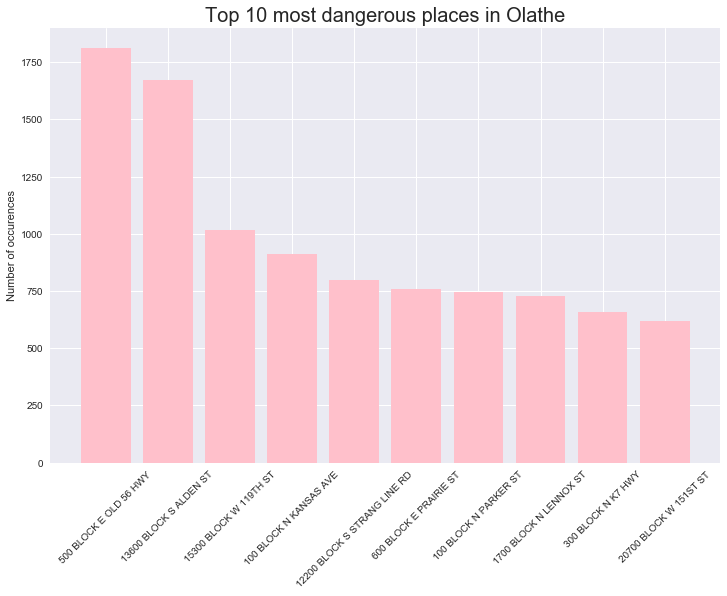

In [45]:
plt.figure(figsize = (12, 8))
plt.bar(np.arange(10), top10_olathe_danger.Counts, color = 'pink')
plt.xticks(np.arange(10), top10_olathe_danger.index, rotation = 45)
plt.ylabel("Number of occurences")
plt.title("Top 10 most dangerous places in Olathe", fontsize = 20)

### Let's visualize crimes by category

In [47]:
kansas_data[kansas_data['ucrcode']=='23H'].offense.head()

57181                               THEFT
70994                               THEFT
73800    CRIMINAL DEPRIVATION OF PROPERTY
74146                               THEFT
76281              THEFT OF MOTOR VEHICLE
Name: offense, dtype: object

In [48]:
kansas_data[kansas_data['ucrcode']=='23'].offense.head()

29                                  THEFT OF MOTOR FUEL
45                                                THEFT
51    THEFT OF PROPERTY OR SERVICES; VALUE $1,000 TO...
58    THEFT OF PROPERTY OR SERVICES; VALUE $1,000 TO...
66    THEFT OF PROPERTY LOST OR MISLAID; OWNER KNOWN...
Name: offense, dtype: object

In [49]:
kansas_data[kansas_data['ucrcode']=='240'].offense.head()

90                      THEFT OF MOTOR VEHICLE
93     CRIMINAL DEPRIVATION OF A MOTOR VEHICLE
176                     THEFT OF MOTOR VEHICLE
426                     THEFT OF MOTOR VEHICLE
531                     THEFT OF MOTOR VEHICLE
Name: offense, dtype: object

In [51]:
kansas_data['Category'] = kansas_data.ucrcode.apply(lambda x: '23' if x == '23H' or x == '240' else x)

In [52]:
kansas_data.Category.value_counts().head(8)

23     110336
13B     35898
90Z     35550
290     29843
35A     19112
90D     19098
220     15310
13C     12794
Name: Category, dtype: int64

In [53]:
top8crime=['23','13B','90Z','290','90D','35A','220','13C']

In [54]:
top8crime_names={'23':'Theft','13B':'Battery', '90Z':'Failure to appear','290':'Criminal damage to property',
                '90D':'Driving under influence of alcohol or drugs','35A':'Possesion of drugs',
                 '220':'Burglary','13C':'Harassment and threats'}

In [55]:
manycolor=['blue','lightsalmon','chocolate','coral','darkblue','deeppink','forestgreen','magenta','gold','indigo','black']

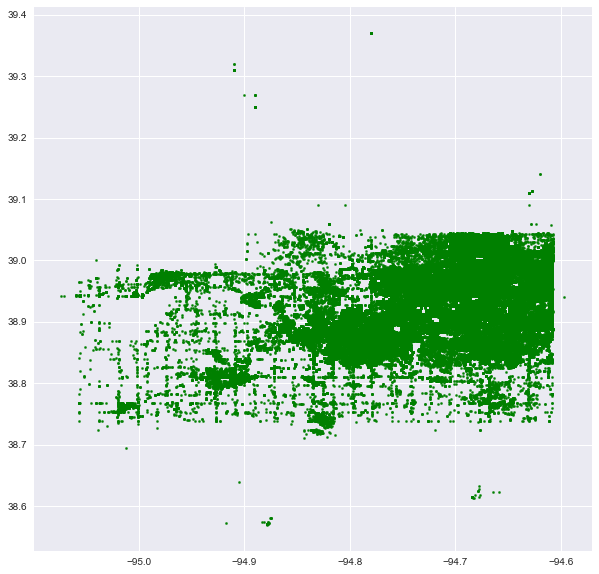

In [56]:
x = kansas_data['x']
y = kansas_data['y']
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(x, y, s = 5, color = 'green')
plt.show()

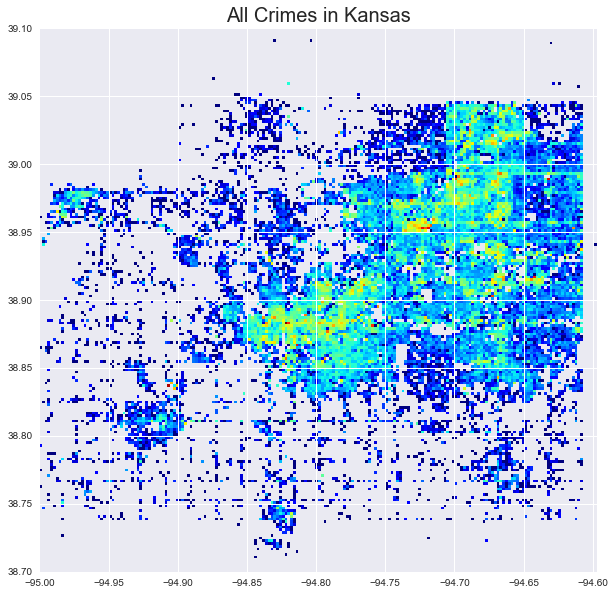

In [58]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize = (10, 10))
ax2 = fig.add_subplot(1,1,1)
ax2.hist2d(x, y, bins = 200, norm = LogNorm(), cmap = plt.cm.jet, range = [[-95, -94.596676], [38.7, 39.1]])
ax2.set_title('All Crimes in Kansas', fontsize = 20)
plt.show()

In [59]:
def category_scatter(category, nrow, ncol, dataset):
    fig = plt.figure(figsize = (10, 20))
    for i in range(1, len(category) + 1):
        ax = 'ax' + str(i)
        ax = fig.add_subplot(nrow, ncol, i)
        ax.scatter(
          dataset.loc[dataset.Category == category[i-1]].x,
          dataset.loc[dataset.Category == category[i-1]].y,
            s = 5,
            color = manycolor[i-1])
        ax.set_title(top8crime_names[category[i-1]])
    plt.suptitle("Scatter Plot By Category")
    plt.tight_layout()
    plt.show()

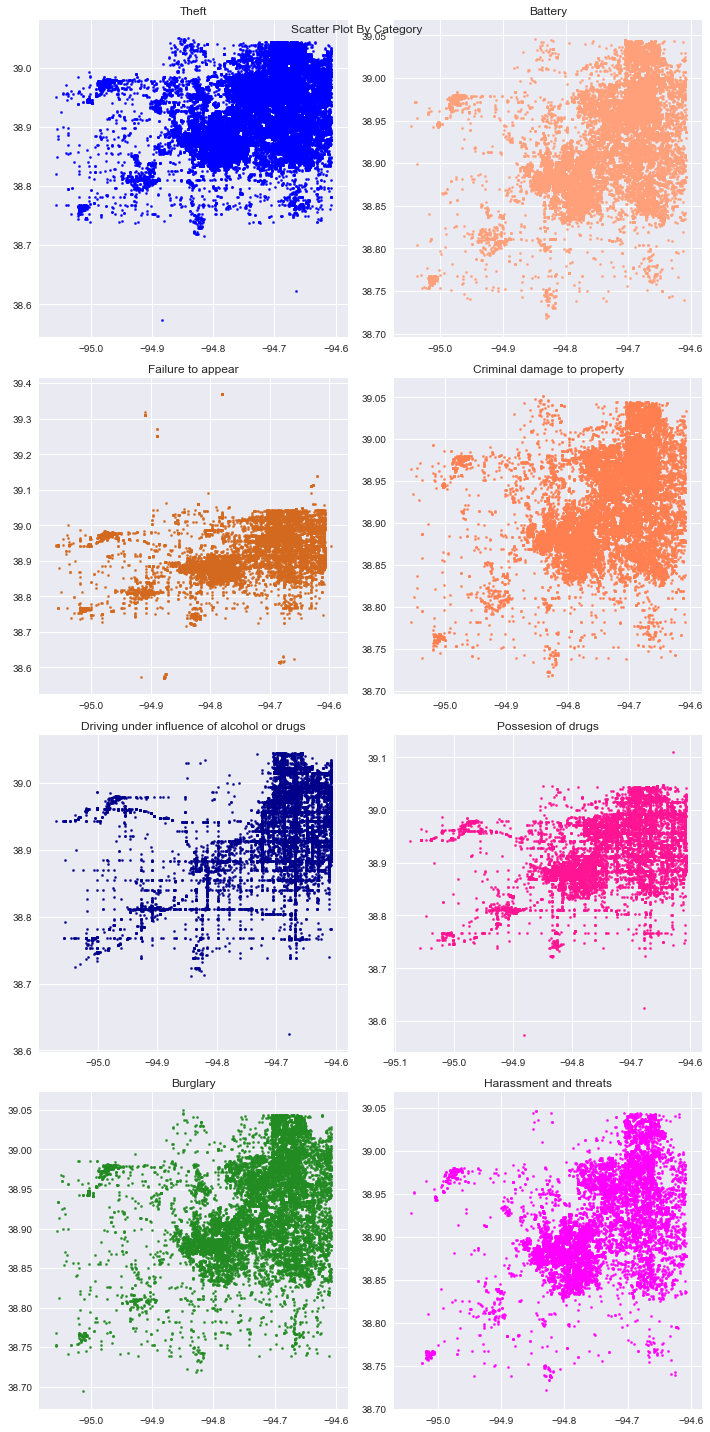

In [60]:
category_scatter(top8crime, 4, 2, kansas_data)

In [61]:
def category_heatmap(category, nrow, ncol, dataset):
    fig = plt.figure(figsize = (10, 20))
    for i in range(1, len(category) + 1):
        ax = 'ax' + str(i)
        ax = fig.add_subplot(nrow, ncol, i)
        ax.hist2d(
          dataset.loc[dataset.Category == category[i-1]].x,
          dataset.loc[dataset.Category == category[i-1]].y,
           bins = 100,
           norm = LogNorm(),
           cmap = plt.cm.jet,
           range = [[-95, -94.596676], [38.7, 39.1]])
        
        ax.set_title(top8crime_names[category[i-1]], fontsize = 20)
    plt.suptitle("Heatmap By Category")
    plt.tight_layout()
    plt.show()

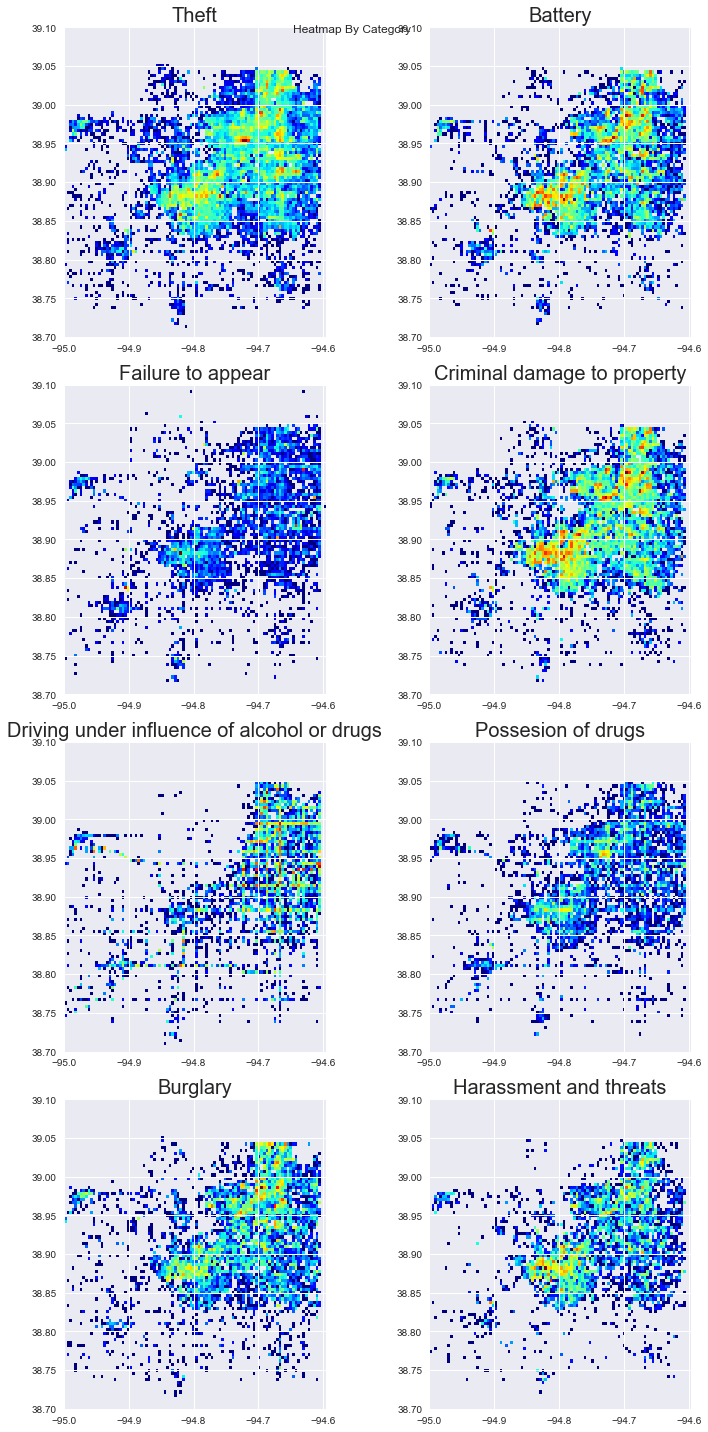

In [62]:
category_heatmap(top8crime,4,2,kansas_data)

### Let's visualize the crimes by time and date. Only consider data of the most recent five years: 2011, 2012, 2013, 2014, 2015.

In [63]:
ks_data=kansas_data[kansas_data.Year>2010]

In [66]:
ks_top8crime=ks_data[ks_data['Category'].isin (top8crime)]

In [67]:
ks_top8crime.describe()

,id,subdivision,spx,spy,x,y,apid,Hour,Minute,Time,Day,DayOfWeek,Week,Month,Year
count,1.064190e+05,95892.000000,1.064190e+05,106419.000000,106419.000000,106419.000000,7.593900e+04,106419.000000,106419.000000,106419.000000,106419.000000,106419.000000,106419.000000,106419.000000,106419.000000
mean,6.018852e+05,444211.378123,2.241584e+06,233817.032619,-94.732784,38.929260,1.997055e+17,12.843975,28.213383,798.851897,15.741155,2.926733,26.362416,6.466261,2012.966453
std,1.365025e+06,293174.893514,2.329796e+04,24163.834340,0.083362,0.065212,3.595789e+15,6.358376,17.813991,381.613142,8.764282,1.963579,14.444086,3.315309,1.419924
min,2.000000e+00,-1.000000,2.144630e+06,101907.000000,-95.073315,38.570910,1.174000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2011.000000
25%,8.653850e+04,19200.000000,2.225554e+06,216208.120000,-94.791098,38.883172,1.990000e+17,9.000000,13.000000,555.000000,8.000000,1.000000,14.000000,4.000000,2012.000000
50%,1.782360e+05,610500.000000,2.246243e+06,234664.000000,-94.715649,38.930323,2.000000e+17,14.000000,29.000000,845.000000,16.000000,3.000000,26.000000,7.000000,2013.000000
75%,2.659255e+05,703400.000000,2.259717e+06,252267.570000,-94.667712,38.979020,2.000000e+17,18.000000,44.000000,1092.000000,23.000000,5.000000,39.000000,9.000000,2014.000000
max,5.029547e+06,900606.000000,2.280137e+06,393749.530000,-94.596676,39.369999,2.020000e+17,23.000000,59.000000,1439.000000,31.000000,6.000000,52.000000,12.000000,2015.000000


In [76]:
monthly_crime_count = ks_top8crime.groupby('FullMonth').size()

In [77]:
monthly_crime_count

FullMonth
Apr     9115
Aug    10051
Dec     6708
Feb     7603
Jan     8508
Jul     9876
Jun     9420
Mar     8698
May     9774
Nov     8632
Oct     9181
Sep     8853
dtype: int64

In [78]:
new_index = [u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug', u'Sep',
       u'Oct', u'Nov', u'Dec']

In [79]:
monthly_crime_count = monthly_crime_count.reindex_axis([u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug', u'Sep',
       u'Oct', u'Nov', u'Dec'], axis = 0)

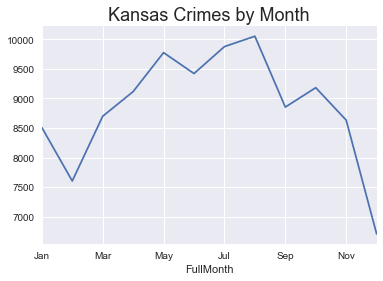

In [80]:
monthly_crime_count.plot()
plt.title('Kansas Crimes by Month',fontsize=18);

In [81]:
weekly_crime_count = ks_top8crime.groupby('FullDayOfWeek').size()

In [82]:
weekly_crime_count.index

Index([u'Friday', u'Monday', u'Saturday', u'Sunday', u'Thursday', u'Tuesday',
       u'Wednesday'],
      dtype='object', name=u'FullDayOfWeek')

In [83]:
weekly_crime_count = weekly_crime_count.reindex_axis([u'Monday', u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday', u'Sunday'], axis = 0)

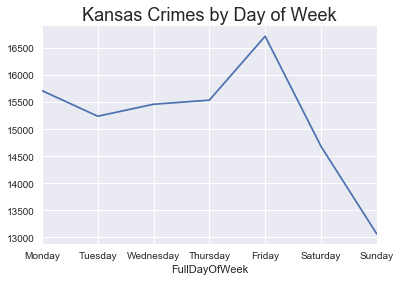

In [84]:
weekly_crime_count.plot()
plt.title('Kansas Crimes by Day of Week',fontsize=18);

In [85]:
hourly_crime_count = ks_top8crime.groupby('Hour').size()

In [86]:
hourly_crime_count.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name=u'Hour')

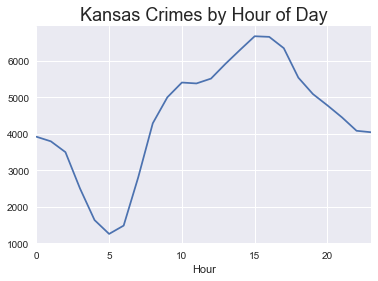

In [87]:
hourly_crime_count.plot()
plt.title('Kansas Crimes by Hour of Day',fontsize=18);

In [89]:
daily_crime_count = ks_top8crime.groupby('Date').size()

In [90]:
daily_crime_count.index

Index([u'2011-01-01', u'2011-01-02', u'2011-01-03', u'2011-01-04',
       u'2011-01-05', u'2011-01-06', u'2011-01-07', u'2011-01-08',
       u'2011-01-09', u'2011-01-10',
       ...
       u'2015-11-22', u'2015-11-23', u'2015-11-24', u'2015-11-25',
       u'2015-11-26', u'2015-11-27', u'2015-11-28', u'2015-11-29',
       u'2015-11-30', u'2015-12-01'],
      dtype='object', name=u'Date', length=1796)

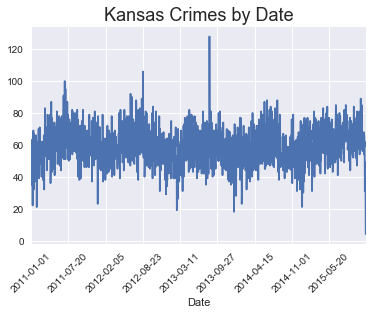

In [103]:
daily_crime_count.plot()
plt.xticks(rotation = 45)
plt.title('Kansas Crimes by Date',fontsize=18);

In [96]:
yearly_crime_count = ks_top8crime.groupby('Year').size()

In [97]:
yearly_crime_count.index

Int64Index([2011, 2012, 2013, 2014, 2015], dtype='int64', name=u'Year')

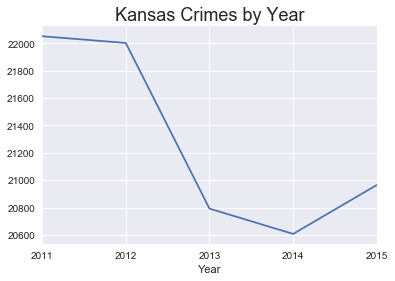

In [102]:
yearly_crime_count.plot()
plt.xticks(yearly_crime_count.index)
plt.title('Kansas Crimes by Year',fontsize=18);

### Let's visualize the crime trend by category.

In [104]:
ks_top8crime['Category']=ks_top8crime['Category'].apply(lambda x: top8crime_names[x])

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
ks_by_month=ks_top8crime.pivot_table('id',aggfunc='count',
                              index='FullMonth', 
                              columns='Category')

In [108]:
ks_by_month.index

Index([u'Apr', u'Aug', u'Dec', u'Feb', u'Jan', u'Jul', u'Jun', u'Mar', u'May',
       u'Nov', u'Oct', u'Sep'],
      dtype='object', name=u'FullMonth')

In [109]:
ks_by_month = ks_by_month.reindex_axis([u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug', u'Sep',
       u'Oct', u'Nov', u'Dec'], axis = 0)

Text(0.5,1,u'Kansas Crimes by Month')

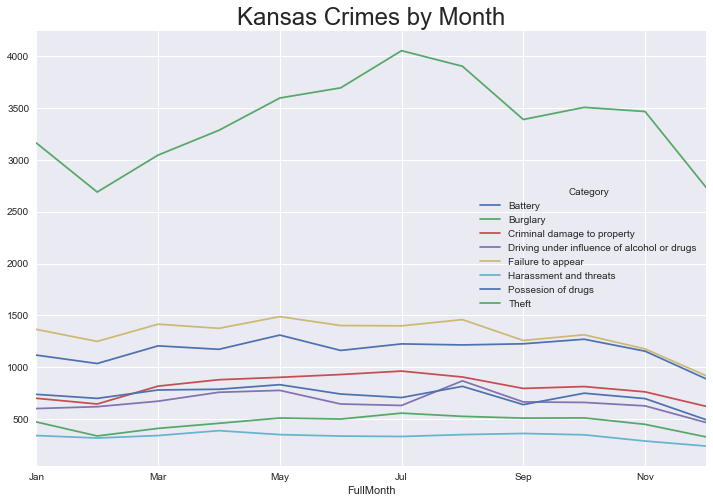

In [110]:
ax = ks_by_month.plot(figsize = (12, 8))
ax.set_title("Kansas Crimes by Month", fontsize = 24)

In [111]:
ks_by_weekday=ks_top8crime.pivot_table('id',aggfunc='count',
                              index='FullDayOfWeek', 
                              columns='Category')

In [113]:
ks_by_weekday.index

Index([u'Friday', u'Monday', u'Saturday', u'Sunday', u'Thursday', u'Tuesday',
       u'Wednesday'],
      dtype='object', name=u'FullDayOfWeek')

In [114]:
ks_by_weekday = ks_by_weekday.reindex_axis([u'Monday', u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday', u'Sunday'], axis = 0)

Text(0.5,1,u'Kansas Crimes by Day of Week')

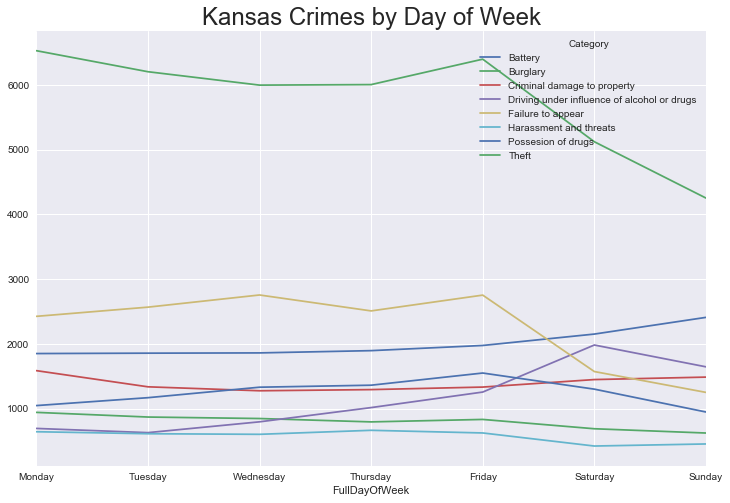

In [115]:
ax = ks_by_weekday.plot(figsize = (12, 8))
ax.set_title("Kansas Crimes by Day of Week", fontsize = 24)

Text(0.5,1,u'Kansas Crimes by Hour')

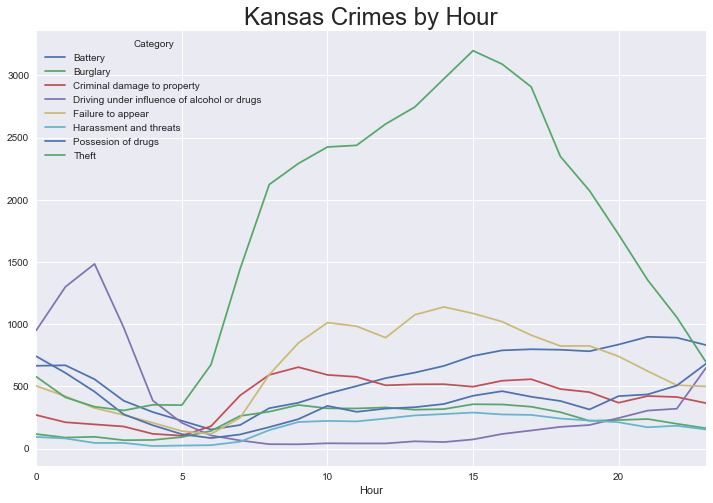

In [116]:
ks_by_hour=ks_top8crime.pivot_table('id',aggfunc='count',
                              index='Hour', 
                              columns='Category')
ax=ks_by_hour.plot(figsize=(12,8))
ax.set_title("Kansas Crimes by Hour",fontsize=24)

In [117]:
ks_by_year=ks_top8crime.pivot_table('id',aggfunc='count',
                              index='Year', 
                              columns='Category')

In [118]:
ks_by_year.index

Int64Index([2011, 2012, 2013, 2014, 2015], dtype='int64', name=u'Year')

Text(0.5,1,u'Kansas Crimes by Year')

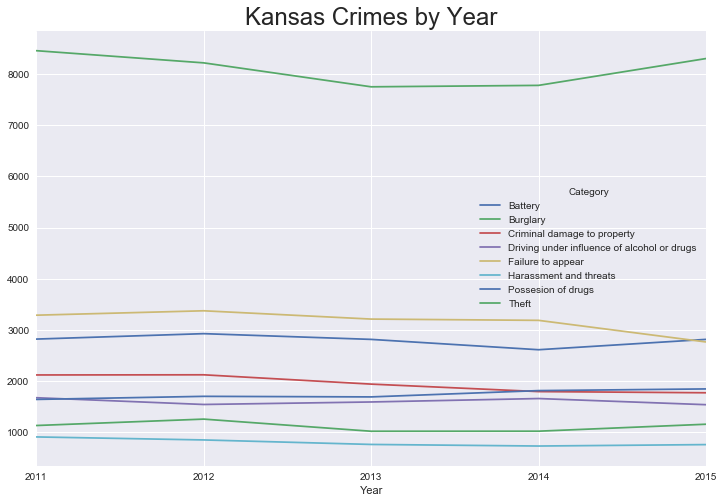

In [120]:
ax = ks_by_year.plot(figsize = (12, 8))
plt.xticks(ks_by_year.index)
ax.set_title("Kansas Crimes by Year", fontsize = 24)

In [121]:
def plot_hourly_crime(data, crime): 
              subset_data = data[data['Category'] == crime]
              hourly_subset = subset_data.groupby(['FullDayOfWeek', 'Hour'], as_index=True).count().reset_index()
              hourly_subset['Category'] = hourly_subset['Category'].astype('float64') 
              hourly_subset['FullDayOfWeek'] = hourly_subset['FullDayOfWeek'].astype('object')
              # Fill in NaN's with 0 if there are any that came up counting over sub-groups
              hourly_subset = hourly_subset[['Hour', 'Category', 'FullDayOfWeek']].fillna(0)
              hourly_subset = hourly_subset.rename(columns={'Category': 'Count'})
              # Get the averages of the hourly data.
              avg_hourly = hourly_subset.groupby(['Hour'], as_index=False).mean()
              avg_hourly['FullDayOfWeek'] = 'Average'
              # Add in Averages as their own entry
              full_hourly = pd.concat([hourly_subset, avg_hourly], axis=0)
              # Specify the order of days to be plotted
              day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                           'Friday', 'Saturday', 'Sunday']
              col_order = ['Average'] + day_names
              # Reformat the time for the plot
              time_labels = ['%02d:00' % x for x in np.arange(24)]
              # Plot the crime
              grid = sns.factorplot(data=full_hourly,
                                    x='Hour', y='Count',
                                    hue='FullDayOfWeek',
                                    col='FullDayOfWeek',
                                    col_wrap=4,
                                    col_order=col_order,
                                    size=5, palette='Set2')
              # Add labels/rotate x-axis
              grid.set_xticklabels(labels=time_labels, rotation=90)
              grid.set(ylim=(0, None)) # Start y-axis at 0, no neg. crime counts plt.subplots_adjust(top=0.93) # Make room for main title
              grid.fig.suptitle('{} Counts for Each Day of the Week Per Hour (Avg. included)'.format(crime.title()),size=15,fontsize=20)
 

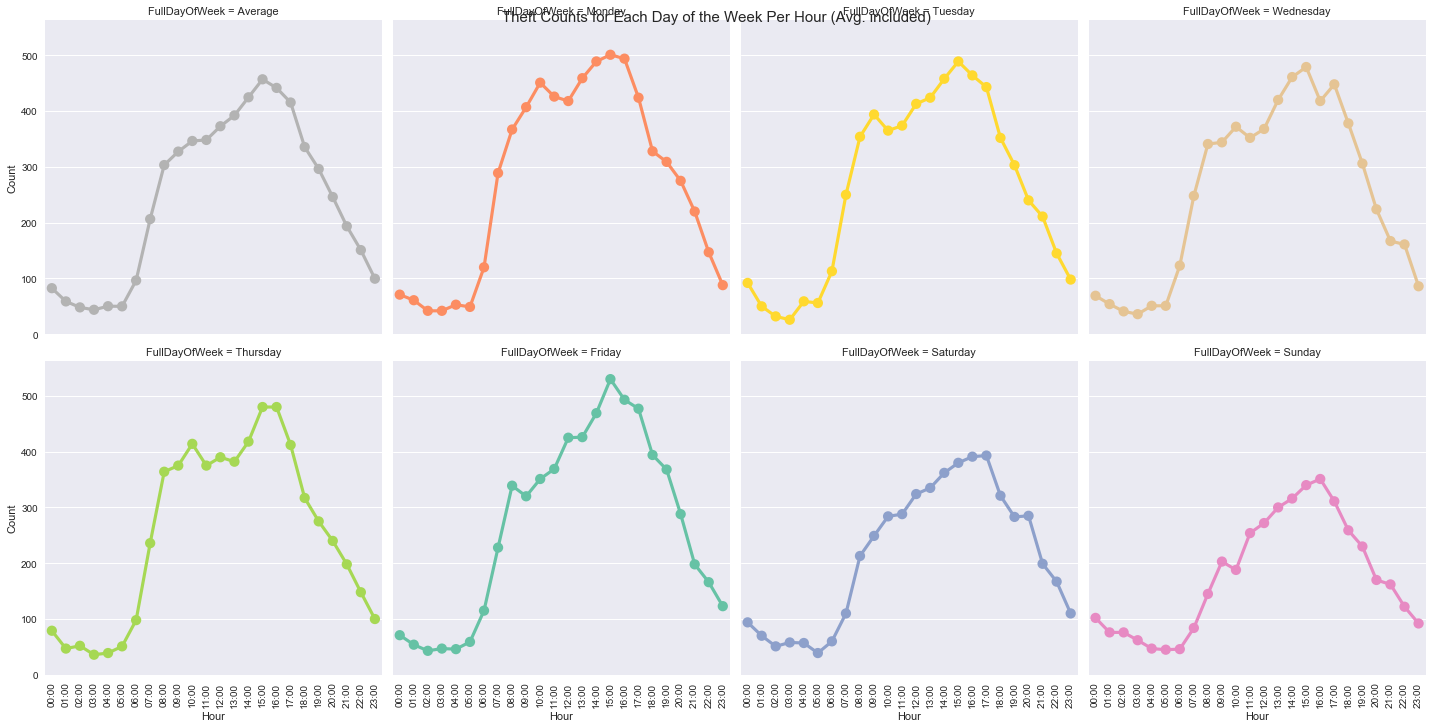

In [122]:
plot_hourly_crime(ks_top8crime, 'Theft')

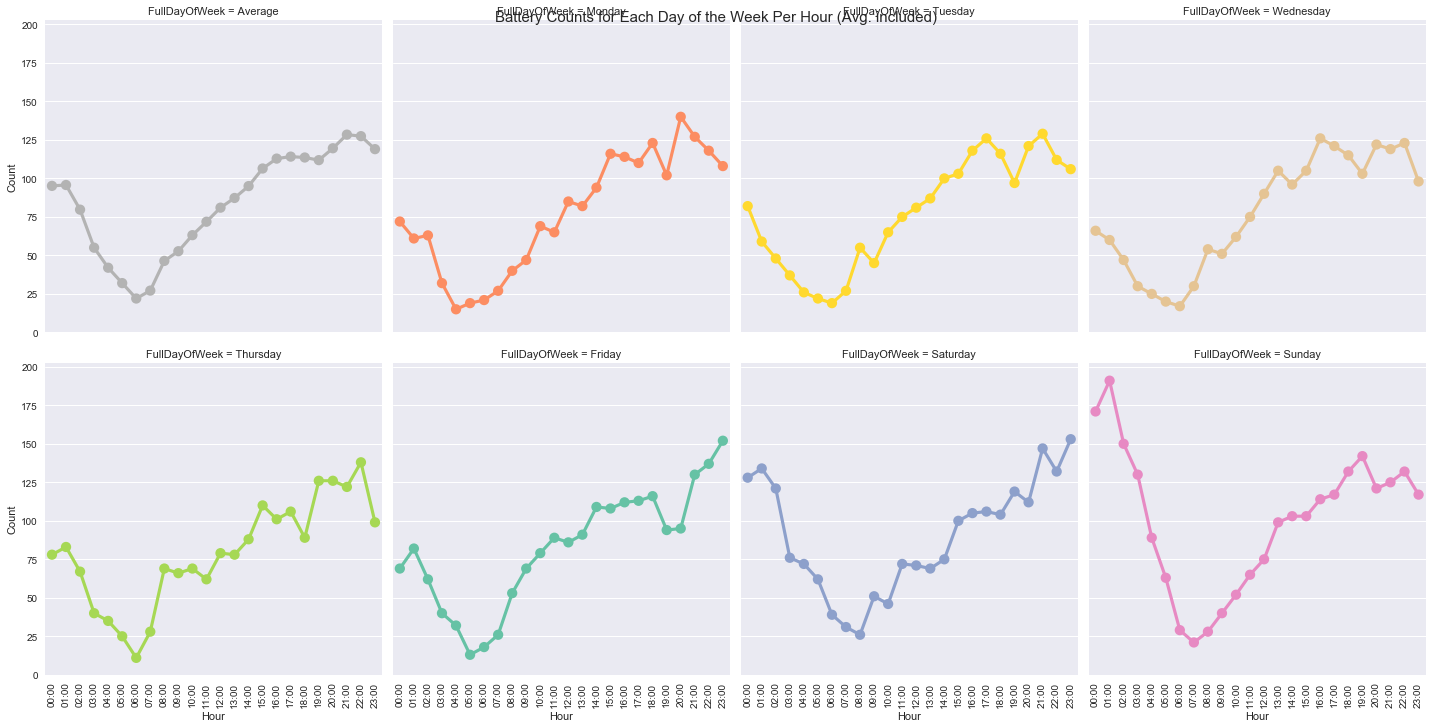

In [123]:
plot_hourly_crime(ks_top8crime,'Battery')

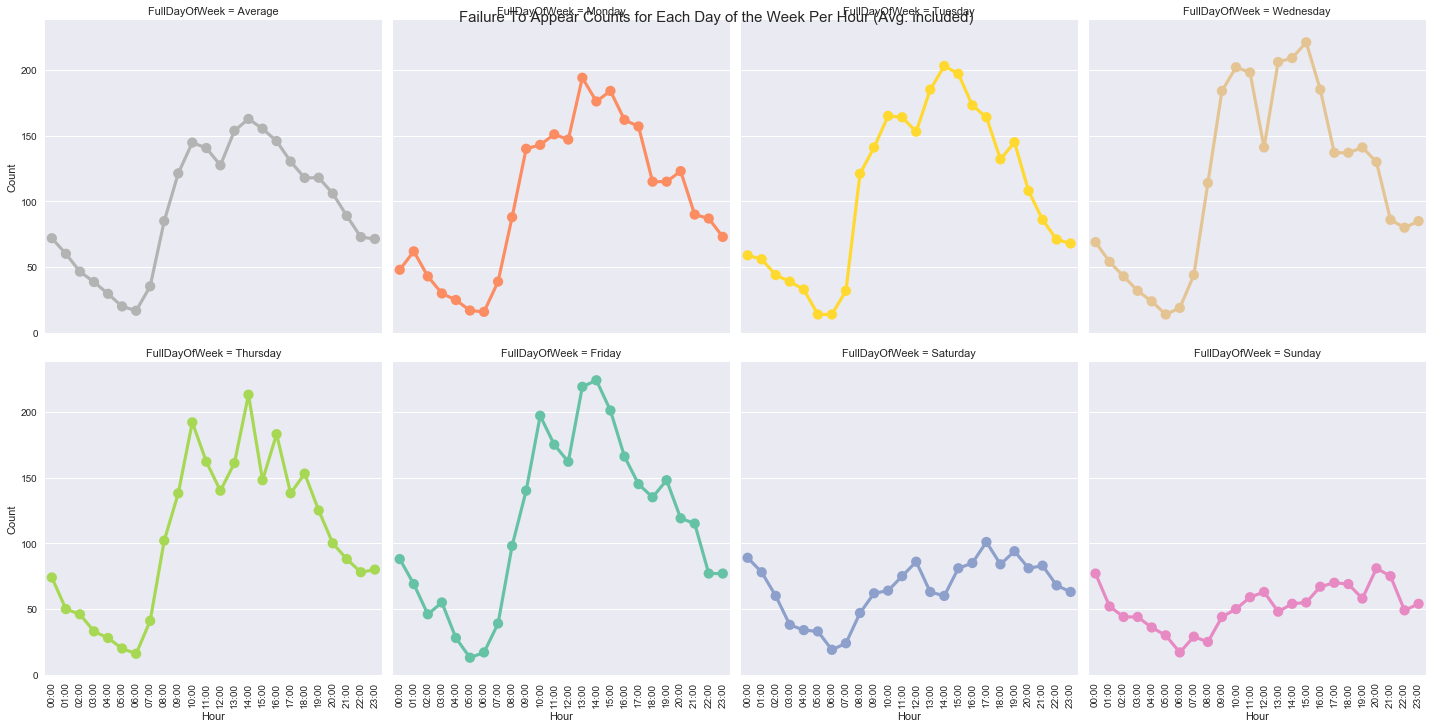

In [124]:
plot_hourly_crime(ks_top8crime,'Failure to appear')

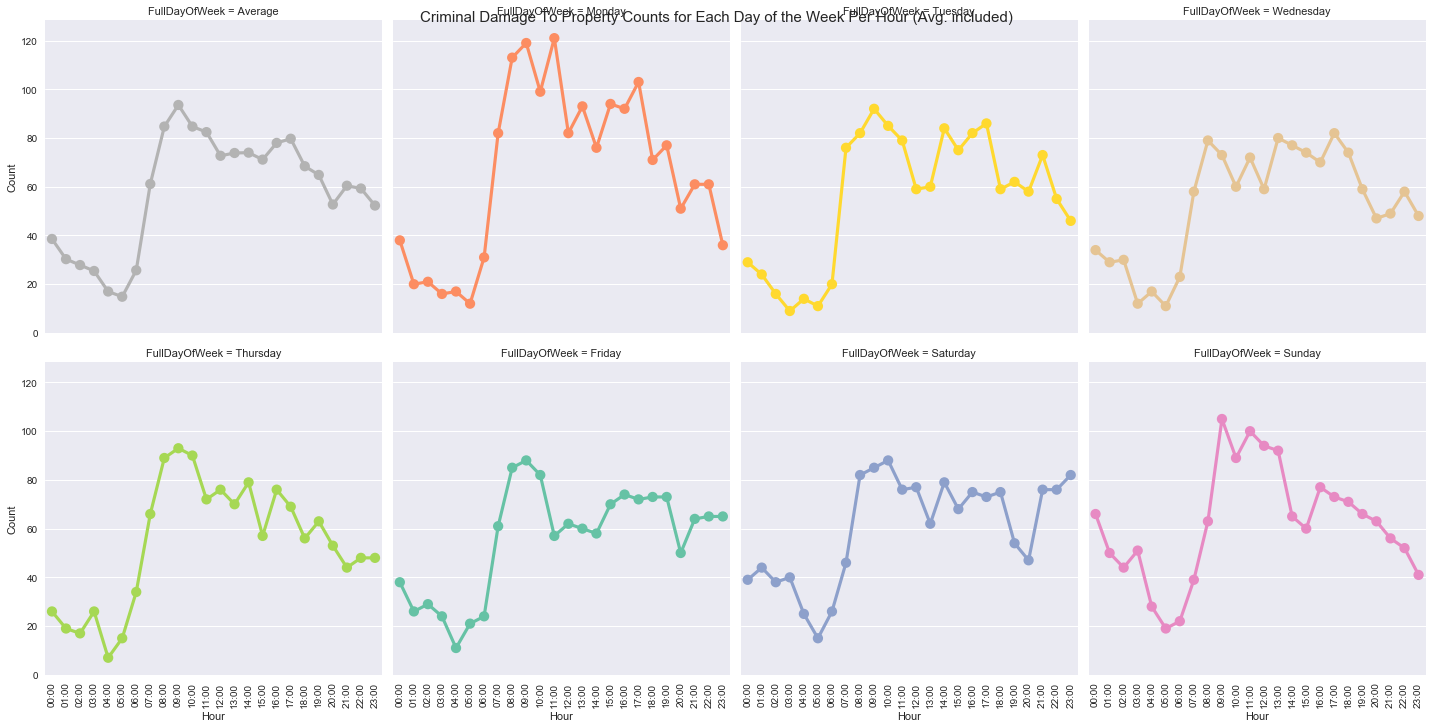

In [125]:
plot_hourly_crime(ks_top8crime,'Criminal damage to property')

In [127]:
court_crime_hour = ks_top8crime[ks_top8crime['Category']=='Failure to appear'].Hour.value_counts()

In [158]:
court_crime_hour.index

Int64Index([14, 15, 13, 16, 10, 11, 17, 12,  9, 19, 18, 20, 21,  8, 22,  0, 23,
             1,  2,  3,  7,  4,  5,  6],
           dtype='int64')

In [159]:
time = [14, 15, 13, 16, 10, 11, 17, 12,  9, 19, 18, 20, 21,  8, 22,  0, 23,
             1,  2,  3,  7,  4,  5,  6]

In [152]:
hour_map = {0: '0 am',
 1: '1 am',
 2: '2 am',
 3: '3 am',
 4: '4 am',
 5: '5 am',
 6: '6 am',
 7: '7 am',
 8: '8 am',
 9: '9 am',
 10: '10 am',
 11: '11 am',
 12: '12 pm',
 13: '1 pm',
 14: '2 pm',
 15: '3 pm',
 16: '4 pm',
 17: '5 pm',
 18: '6 pm',
 19: '7 pm',
 20: '8 pm',
 21: '9 pm',
 22: '10 pm',
 23: '11 pm'}

In [162]:
time_period = []
for i in range(len(time)):
    time_period.append(hour_map[time[i]])
time_period

['2 pm',
 '3 pm',
 '1 pm',
 '4 pm',
 '10 am',
 '11 am',
 '5 pm',
 '12 pm',
 '9 am',
 '7 pm',
 '6 pm',
 '8 pm',
 '9 pm',
 '8 am',
 '10 pm',
 '0 am',
 '11 pm',
 '1 am',
 '2 am',
 '3 am',
 '7 am',
 '4 am',
 '5 am',
 '6 am']

Text(0.5,1,u'Failure to appear report time')

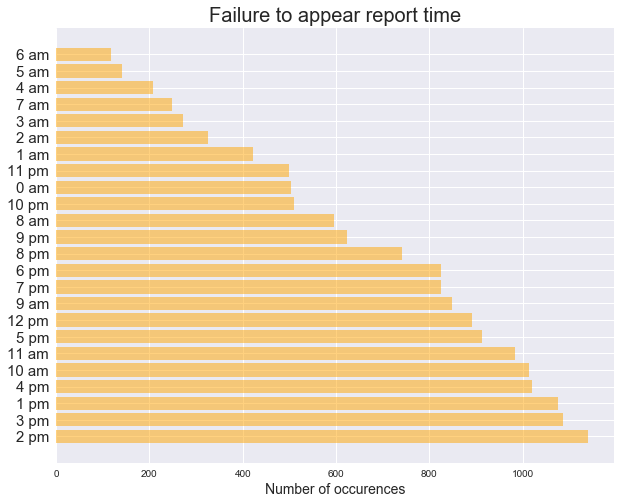

In [163]:
plt.figure(figsize=(10,8))
y_pos=np.arange(len(court_crime_hour.keys()))
plt.barh(y_pos, court_crime_hour.get_values(), align = 'center', alpha = 0.5, color = 'orange')
plt.yticks(y_pos, time_period, fontsize = 15)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('Failure to appear report time', fontsize = 20)